In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [6]:
'''def compute_loss(y, tx, w):
    """Calculate the loss. You can calculate the loss using mse or mae."""
    # ***************************************************
    # Lost function by MSE 
    w = np.transpose(w);
    losses = (((y - np.dot(tx,w))**2).mean(axis = 0)) / 2
    return losses'''

'def compute_loss(y, tx, w):\n    """Calculate the loss. You can calculate the loss using mse or mae."""\n    # ***************************************************\n    # Lost function by MSE \n    w = np.transpose(w); \n    N = len(y)\n    losses = (((y - np.dot(tx,w))**2).mean(axis = 0)) / 2\n    return losses'

In [7]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)

def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))

def compute_loss(y, tx, w):
    # ***************************************************
    # Loss function with MSE 
    e = y - tx.dot(w)
    return calculate_mse(e)

In [8]:
w = [1, 2]
compute_loss (y, tx, w) 

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

In [9]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # Compute loss for each combination of w0 and w1.
    
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            w = [w0[i], w1[j]]; 
            cost = compute_loss(y, tx, w)
            losses[i, j] = cost;
            
    return losses
    # ***************************************************

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.505 seconds


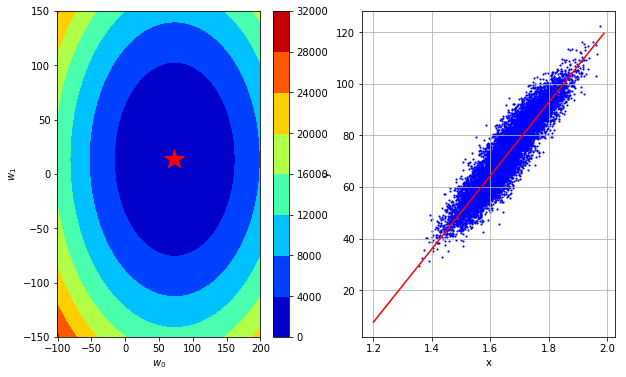

In [10]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [77]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # Compute gradient and loss for MSE
    w = np.transpose(w) #does not change the output
    N = len(y)
    
    # MSE 
    gradient = -((1/N)*(np.dot(np.transpose(tx), y - np.dot(tx,w))))
    cost = err = y - tx.dot(w)
    
    return gradient, cost

In [78]:
'''def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err'''

'def compute_gradient(y, tx, w):\n    """Compute the gradient."""\n    err = y - tx.dot(w)\n    grad = -tx.T.dot(err) / len(err)\n    return grad, err'

In [79]:
#test 
from numpy import linalg as LA
w1 = [100, 20]
w2 = [50, 10]

print (compute_gradient(y, tx, w1))
print (compute_gradient(y, tx, w2))

#print(LA.norm (compute_gradient(y, tx, w1)))
#print(LA.norm (compute_gradient(y, tx, w2)))



(array([ 25.93219415,   8.96510513]), array([ -22.32689261,  -17.92718129,  -24.63417658,  -23.63449165,
        -31.70292833,  -27.62655258,  -25.50641849,  -23.92982515,
        -23.35598073,  -33.74865133,  -29.67652578,  -15.79033443,
        -33.27665772,  -27.59793788,  -29.28149088,  -27.20987412,
        -32.07746581,  -35.23651631,  -25.42674646,  -22.03588339,
        -28.7748618 ,  -23.76318749,  -27.52876681,  -33.24234919,
        -21.41631514,  -28.39355357,  -22.16735411,  -36.89477342,
        -27.70501835,  -18.94453134,  -28.9819049 ,  -22.3489174 ,
        -25.62502766,  -35.23506748,  -29.90961497,  -21.9334246 ,
        -28.55865171,  -35.31325355,  -20.57342373,  -12.26681912,
        -26.31820034,  -23.43375291,  -21.66629668,  -27.66816181,
        -35.06687416,  -31.9751006 ,  -17.65326571,  -33.17821653,
        -30.21053886,  -35.6937882 ,  -21.45092258,  -33.05578578,
        -34.18944659,  -31.17923466,  -30.99487172,  -41.52322329,
        -37.78780208,  -

Please fill in the functions `gradient_descent` below:

In [74]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient and loss
        gradient, cost = compute_gradient (y, tx, w)
        loss = calculate_mse(cost)

        # update w by gradient
        w = w - gamma*gradient #computes the new w(t+1)
        
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [75]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.8

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=59.25424468394106, w1=8.827915892791337
Gradient Descent(1/49): loss=178.0869054799337, w0=71.1050936207293, w1=10.593499071349564
Gradient Descent(2/49): loss=70.41697711769658, w0=73.47526340808696, w1=10.946615707061195
Gradient Descent(3/49): loss=66.1101799832071, w0=73.94929736555848, w1=11.017239034203518
Gradient Descent(4/49): loss=65.93790809782753, w0=74.04410415705279, w1=11.031363699631985
Gradient Descent(5/49): loss=65.93101722241235, w0=74.06306551535165, w1=11.034188632717678
Gradient Descent(6/49): loss=65.93074158739573, w0=74.06685778701143, w1=11.034753619334815
Gradient Descent(7/49): loss=65.93073056199508, w0=74.06761624134337, w1=11.034866616658244
Gradient Descent(8/49): loss=65.93073012097905, w0=74.06776793220976, w1=11.03488921612293
Gradient Descent(9/49): loss=65.9307301033384, w0=74.06779827038305, w1=11.034893736015865
Gradient Descent(10/49): loss=65.93073010263277, w0=74.06780433801771, w1=11.0348946

<function __main__.plot_figure>

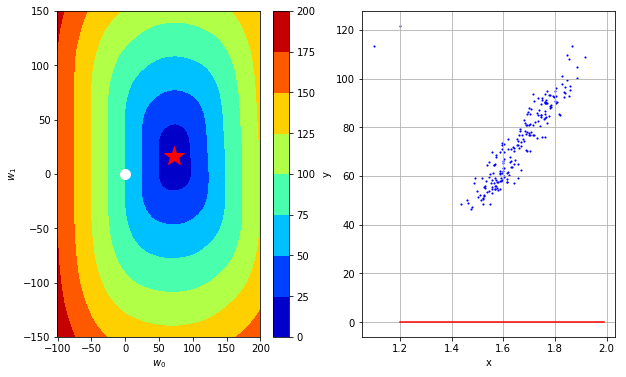

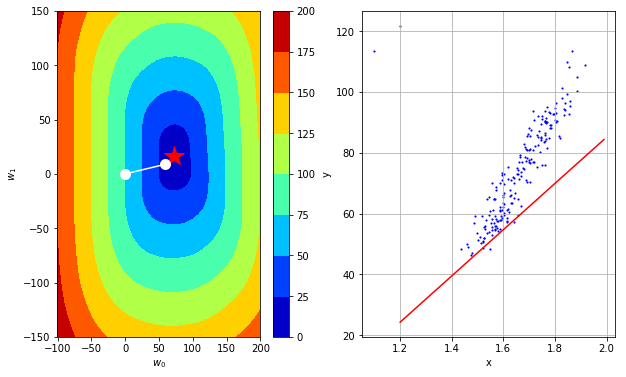

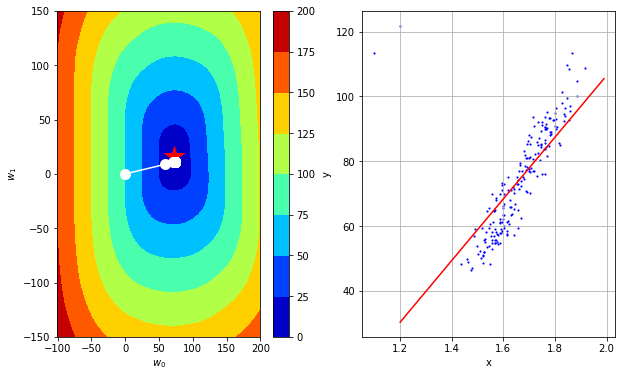

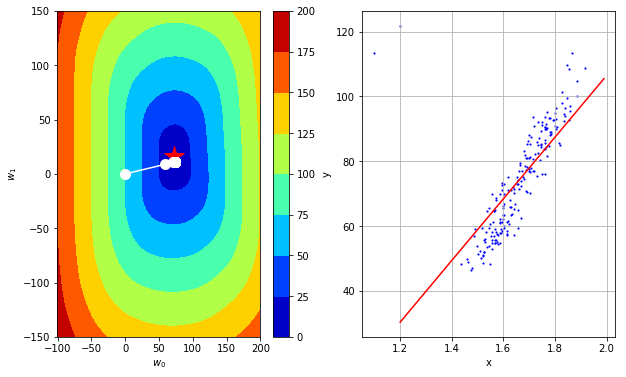

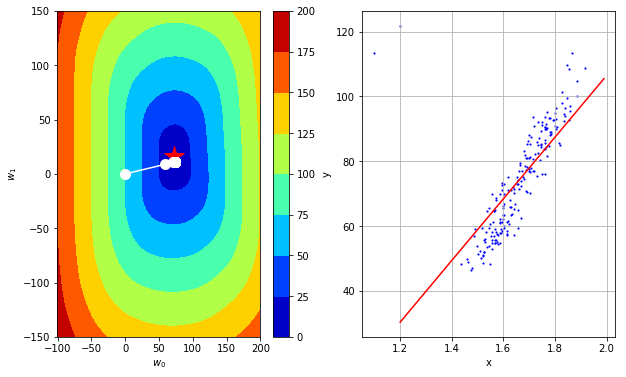

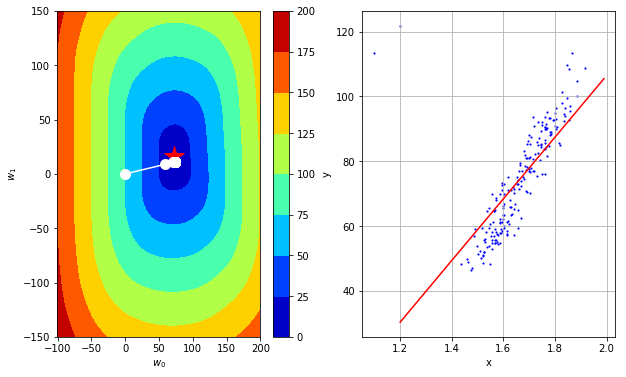

In [76]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [29]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # implement stochastic gradient computation.It's same as the gradient descent.
    return compute_gradient(y, tx, w)
    
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # implement stochastic gradient descent.
    ws = [initial_w]
    losses = []
    w = initial_w
    g = 0
    for n_iter in range(max_iters):
        #num_batches = 5
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            grad, _ = compute_stoch_gradient(minibatch_y, minibatch_tx, w)

            # update w by gradient
            w = w - gamma*grad #computes the new w(t+1)
            loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [32]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2008.3213773445386, w0=42.18231053654509, w1=-41.456055612499384
Gradient Descent(1/49): loss=1952.9032066104955, w0=48.1904964829945, w1=-43.483895813521656
Gradient Descent(2/49): loss=1711.7337101792689, w0=24.46558810546778, w1=-18.27701053038275
Gradient Descent(3/49): loss=1023.6846488382278, w0=54.05244421434246, w1=-27.095687186971936
Gradient Descent(4/49): loss=1002.8767396852901, w0=56.83264358436796, w1=-27.7999195460093
Gradient Descent(5/49): loss=898.1783056759656, w0=32.73386204023364, w1=2.503995077856633
Gradient Descent(6/49): loss=93.58703997254096, w0=60.93137180815255, w1=15.369066004182642
Gradient Descent(7/49): loss=183.35773485648681, w0=75.53595279028812, w1=31.67083642225698
Gradient Descent(8/49): loss=184.63378000620256, w0=75.14790900930939, w1=31.78431613055876
Gradient Descent(9/49): loss=138.8977096163124, w0=86.3908765224963, w1=22.168407721726474
Gradient Descent(10/49): loss=115.88524015955308, w0=73.40597722263688, w1=2

<function __main__.plot_figure>

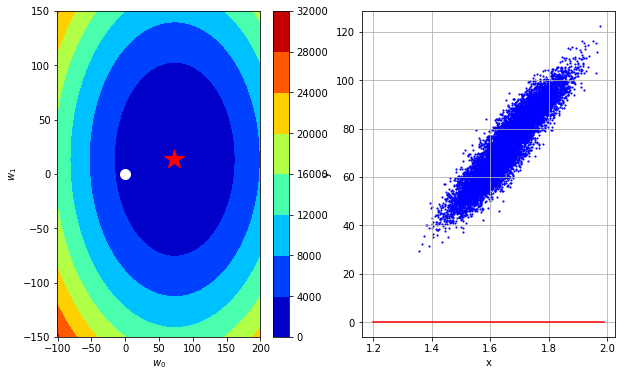

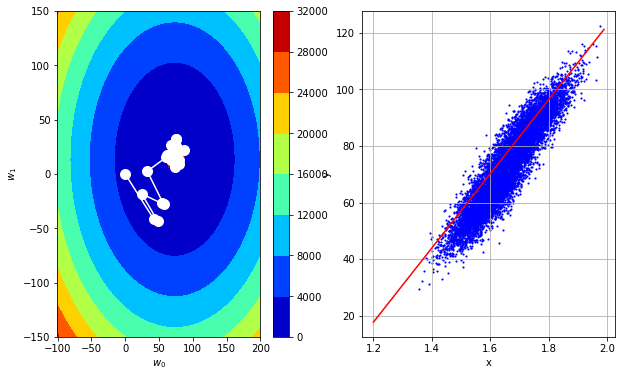

In [33]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [46]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [61]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    #compute gradient and loss
    N = len(y)
    
    # MAE gradient: (demonstration is in notability ex6 - série 02)
    gradient = -((1/N)*(np.dot(np.transpose(tx),np.sign(y - np.dot(tx,w)))))    
    return gradient

In [62]:
def compute_loss(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    #Lost function by MAE 
    N = len(y)
    losses = (np.abs((y - np.dot(tx,w)))).mean(axis = 0)
    return losses

In [63]:
w = [1, 2]
print (compute_subgradient(y, tx, w))
print (compute_loss (y, tx, w))

[ -1.00000000e+00  -8.72789190e-16]
73.0678058549


In [64]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            w = [w0[i], w1[j]]; 
            cost = compute_loss(y, tx, w)
            losses[i, j] = cost;
            
    return losses
    
    # ***************************************************
    raise NotImplementedError

Grid Search: loss*=5.346730200852732, w0*=72.72727272727272, w1*=16.666666666666657, execution time=0.142 seconds


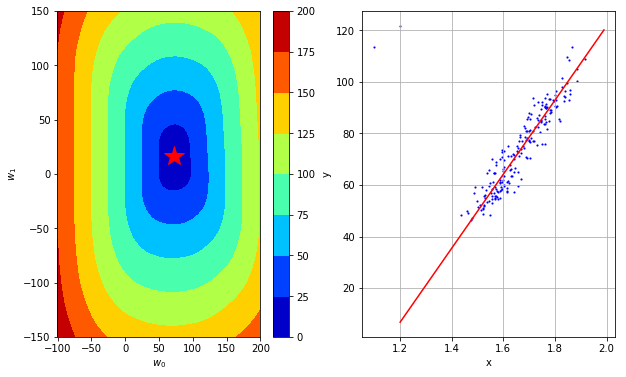

In [65]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [66]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.8


# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=402.7055803833242, w0=79.2542446839411, w1=10.827915892791255
Gradient Descent(1/49): loss=79.40172411383223, w0=75.10509362072932, w1=10.993499071349527
Gradient Descent(2/49): loss=66.46956986305254, w0=74.27526340808696, w1=11.026615707061184
Gradient Descent(3/49): loss=65.95228369302134, w0=74.10929736555849, w1=11.033239034203515
Gradient Descent(4/49): loss=65.93159224622009, w0=74.0761041570528, w1=11.034563699631985
Gradient Descent(5/49): loss=65.93076458834804, w0=74.06946551535165, w1=11.034828632717677
Gradient Descent(6/49): loss=65.93073148203317, w0=74.06813778701142, w1=11.034881619334817
Gradient Descent(7/49): loss=65.93073015778057, w0=74.06787224134338, w1=11.034892216658243
Gradient Descent(8/49): loss=65.93073010481046, w0=74.06781913220976, w1=11.03489433612293
Gradient Descent(9/49): loss=65.93073010269165, w0=74.06780851038305, w1=11.034894760015867
Gradient Descent(10/49): loss=65.93073010260692, w0=74.06780638601771, w1=11.034894

<function __main__.plot_figure>

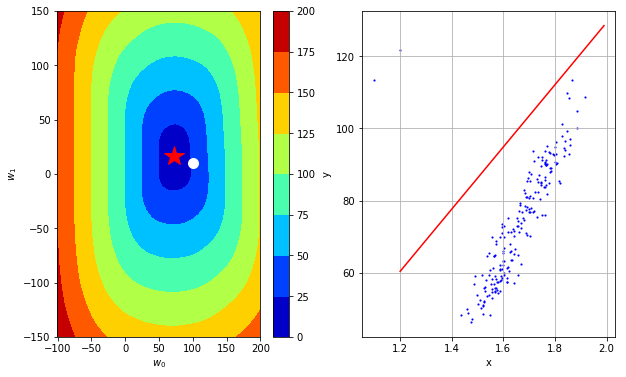

In [67]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

In [68]:
def compute_stoch_subgradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # implement stochastic gradient computation.It's same as the gradient descent.
    return compute_subgradient(y, tx, w)
    
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # implement stochastic gradient descent.
    
    ws = [initial_w]
    losses = []
    w = initial_w
    g = 0
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches):
            g = compute_stoch_subgradient(minibatch_y, minibatch_tx, w)        
            #update w by gradient
            w = w - gamma*g #computes the new w(t+1)
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [69]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=30.07176665849637, w0=52.63137480071905, w1=-18.118720297522362
Gradient Descent(1/49): loss=43.04773843671616, w0=105.07285836622398, w1=57.74750055275466
Gradient Descent(2/49): loss=41.94279401732907, w0=98.89923499016517, w1=60.97472451992852
Gradient Descent(3/49): loss=42.12108989404485, w0=92.89919210371104, w1=63.94975137553048
Gradient Descent(4/49): loss=42.45535003459743, w0=103.6941463242486, w1=58.05684779024661
Gradient Descent(5/49): loss=13.166371900082932, w0=62.81104694913185, w1=25.747172873329113
Gradient Descent(6/49): loss=22.290793149986378, w0=86.63581115971724, w1=-9.204852080814312
Gradient Descent(7/49): loss=22.499473279448296, w0=94.87032152225783, w1=-1.6038433821657323
Gradient Descent(8/49): loss=35.44725387488865, w0=107.10688763953894, w1=25.317691801276222
Gradient Descent(9/49): loss=21.168764184395112, w0=87.64270445637163, w1=35.49247484906893
Gradient Descent(10/49): loss=9.190093269074165, w0=65.14763472570436, w1=15.

<function __main__.plot_figure>

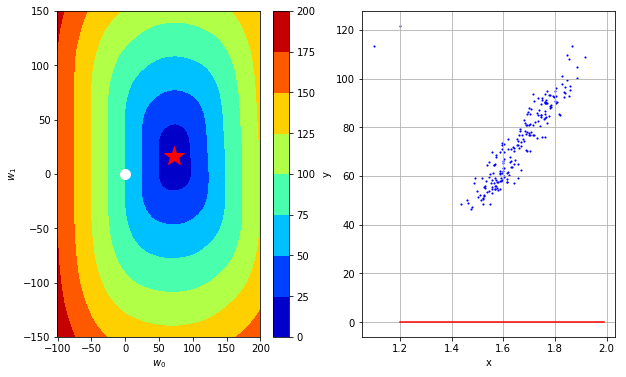

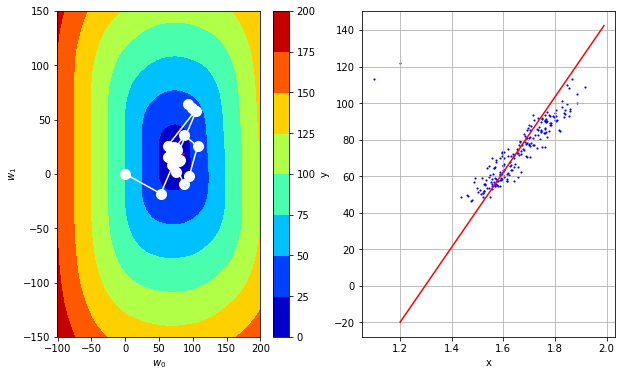

In [70]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)